In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from autoviz.AutoViz_Class import AutoViz_Class

## **Fetching Dataset and Converting to Pandas DataFrame**

In [132]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [133]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [134]:
dataset = pd.DataFrame(data.data,columns=data.feature_names)
dataset['target'] = data.target
print(dataset.shape)
dataset.head(10)


(20640, 9)


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252    41.0    6.984127  1.023810      322.0    2.555556    37.88    
1  8.3014    21.0    6.238137  0.971880     2401.0    2.109842    37.86    
2  7.2574    52.0    8.288136  1.073446      496.0    2.802260    37.85    
3  5.6431    52.0    5.817352  1.073059      558.0    2.547945    37.85    
4  3.8462    52.0    6.281853  1.081081      565.0    2.181467    37.85    
5  4.0368    52.0    4.761658  1.103627      413.0    2.139896    37.85    
6  3.6591    52.0    4.931907  0.951362     1094.0    2.128405    37.84    
7  3.1200    52.0    4.797527  1.061824     1157.0    1.788253    37.84    
8  2.0804    42.0    4.294118  1.117647     1206.0    2.026891    37.84    
9  3.6912    52.0    4.970588  0.990196     1551.0    2.172269    37.84    

   Longitude  target  
0  -122.23     4.526  
1  -122.22     3.585  
2  -122.24     3.521  
3  -122.25     3.413  
4  -122.25     3.422  
5  -122.25     2.697  
6  -122.25     2.992  
7  -122.25     2.414  
8  -122.26     2.267  
9  -122.25     2.611

## **Data Visualization**

Shape of your Data Set loaded: (20640, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################
To fix these data quality issues in

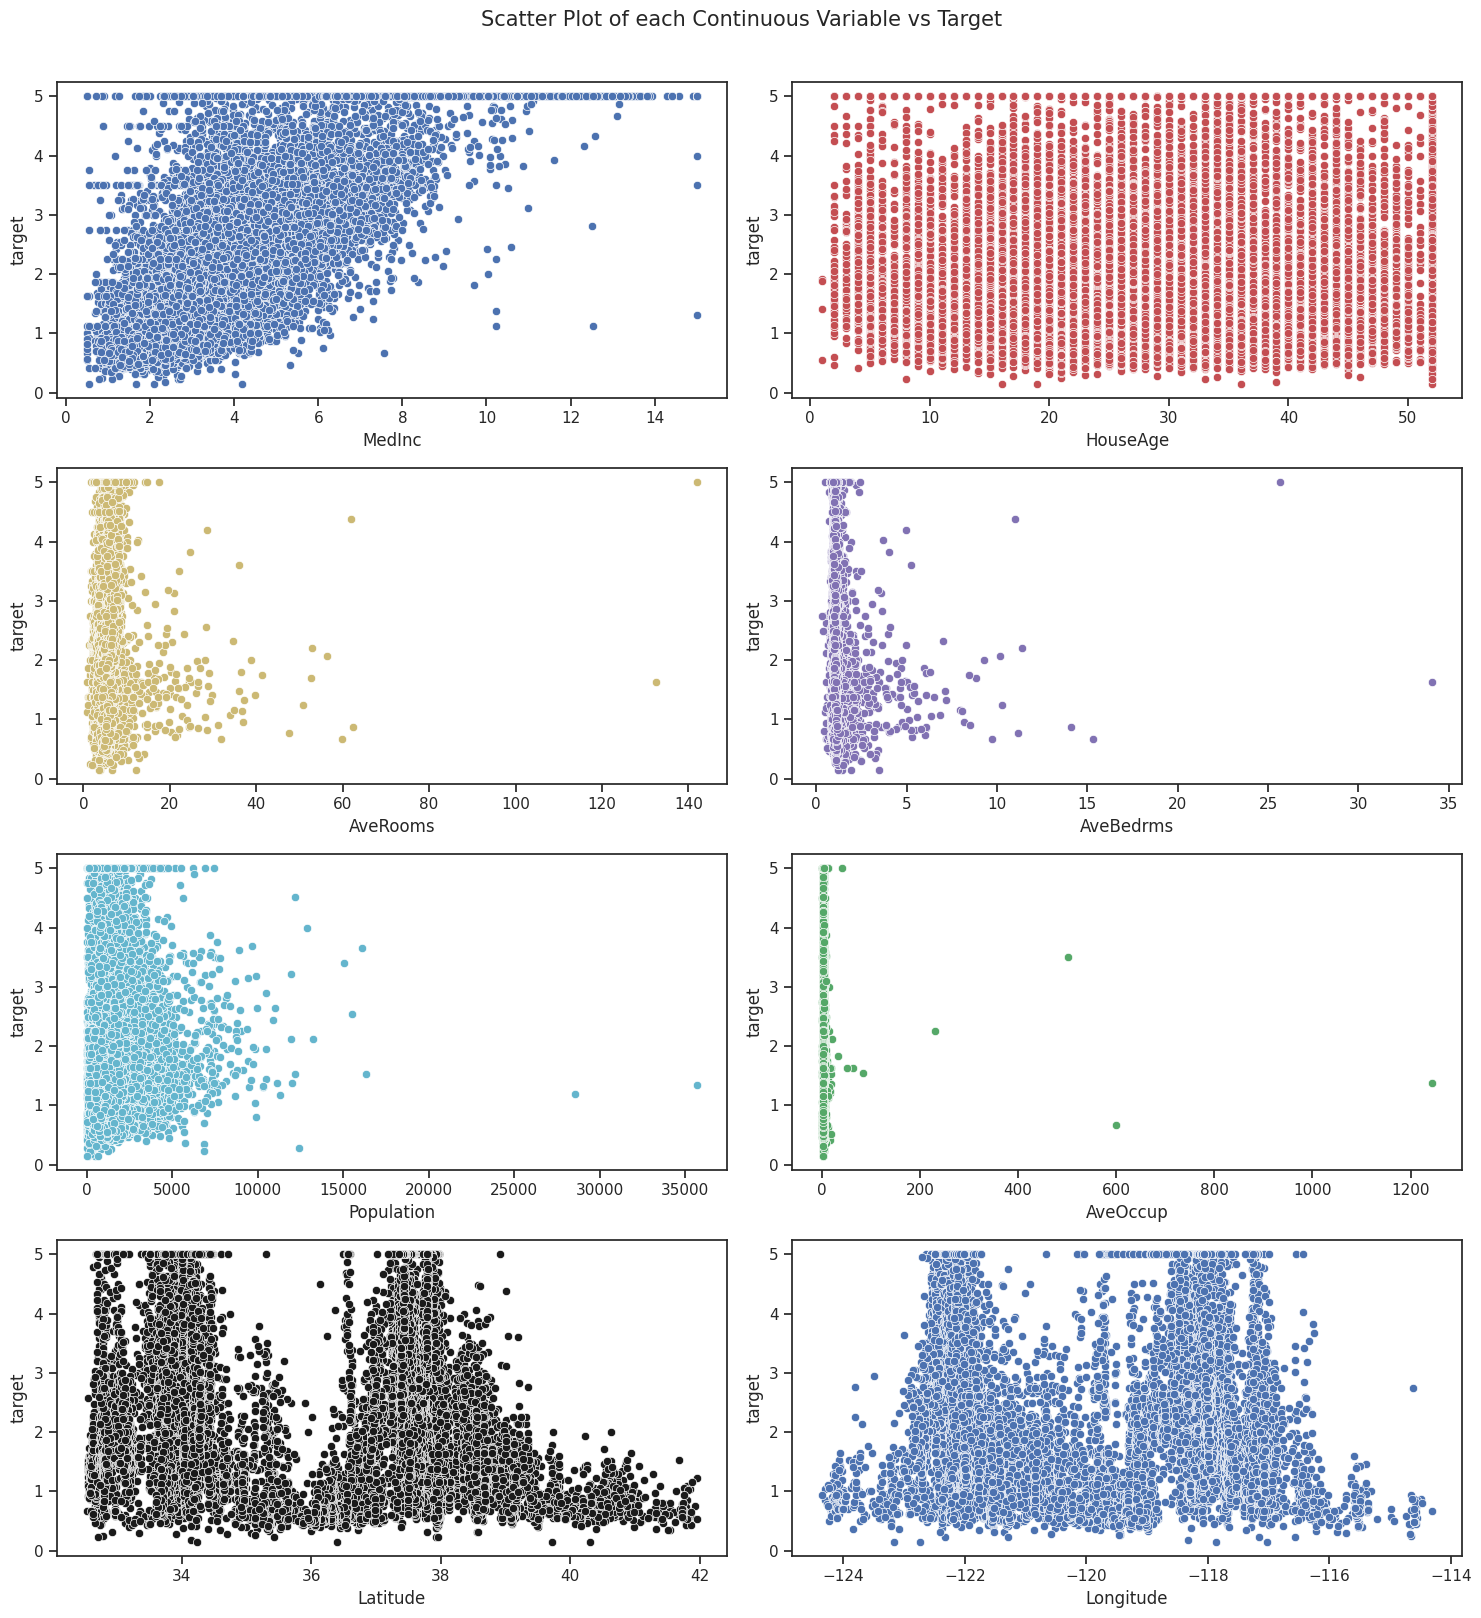

Number of All Scatter Plots = 36


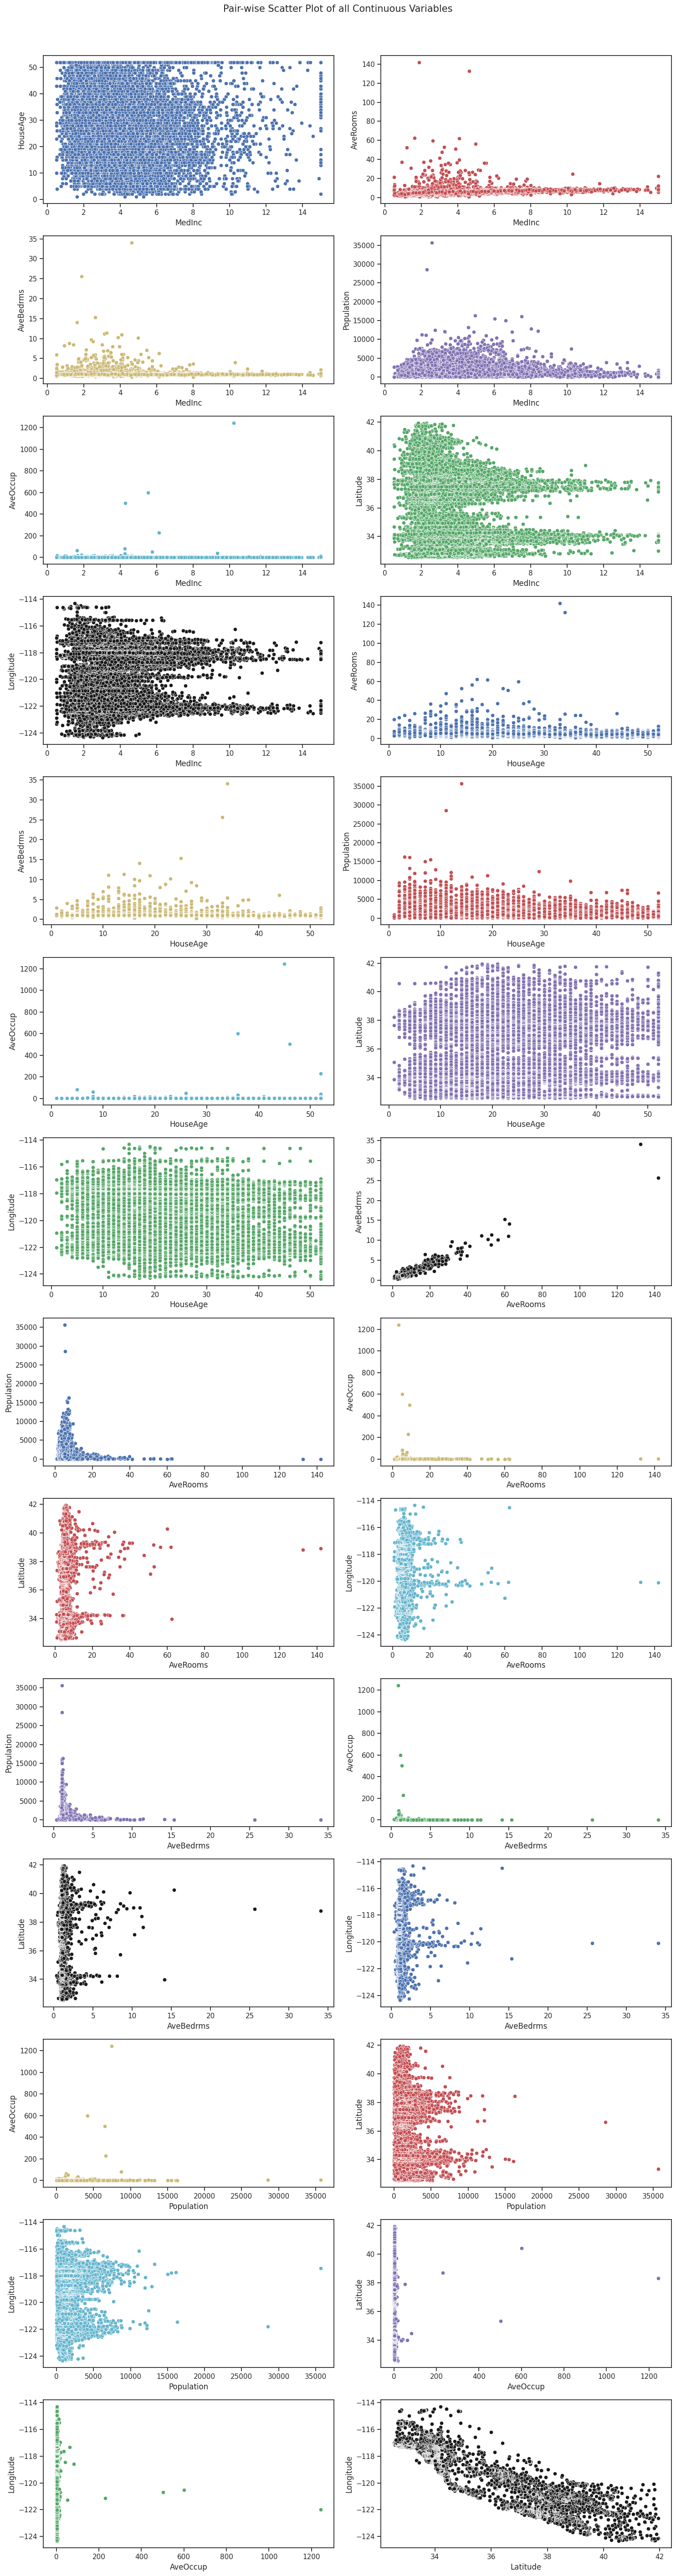

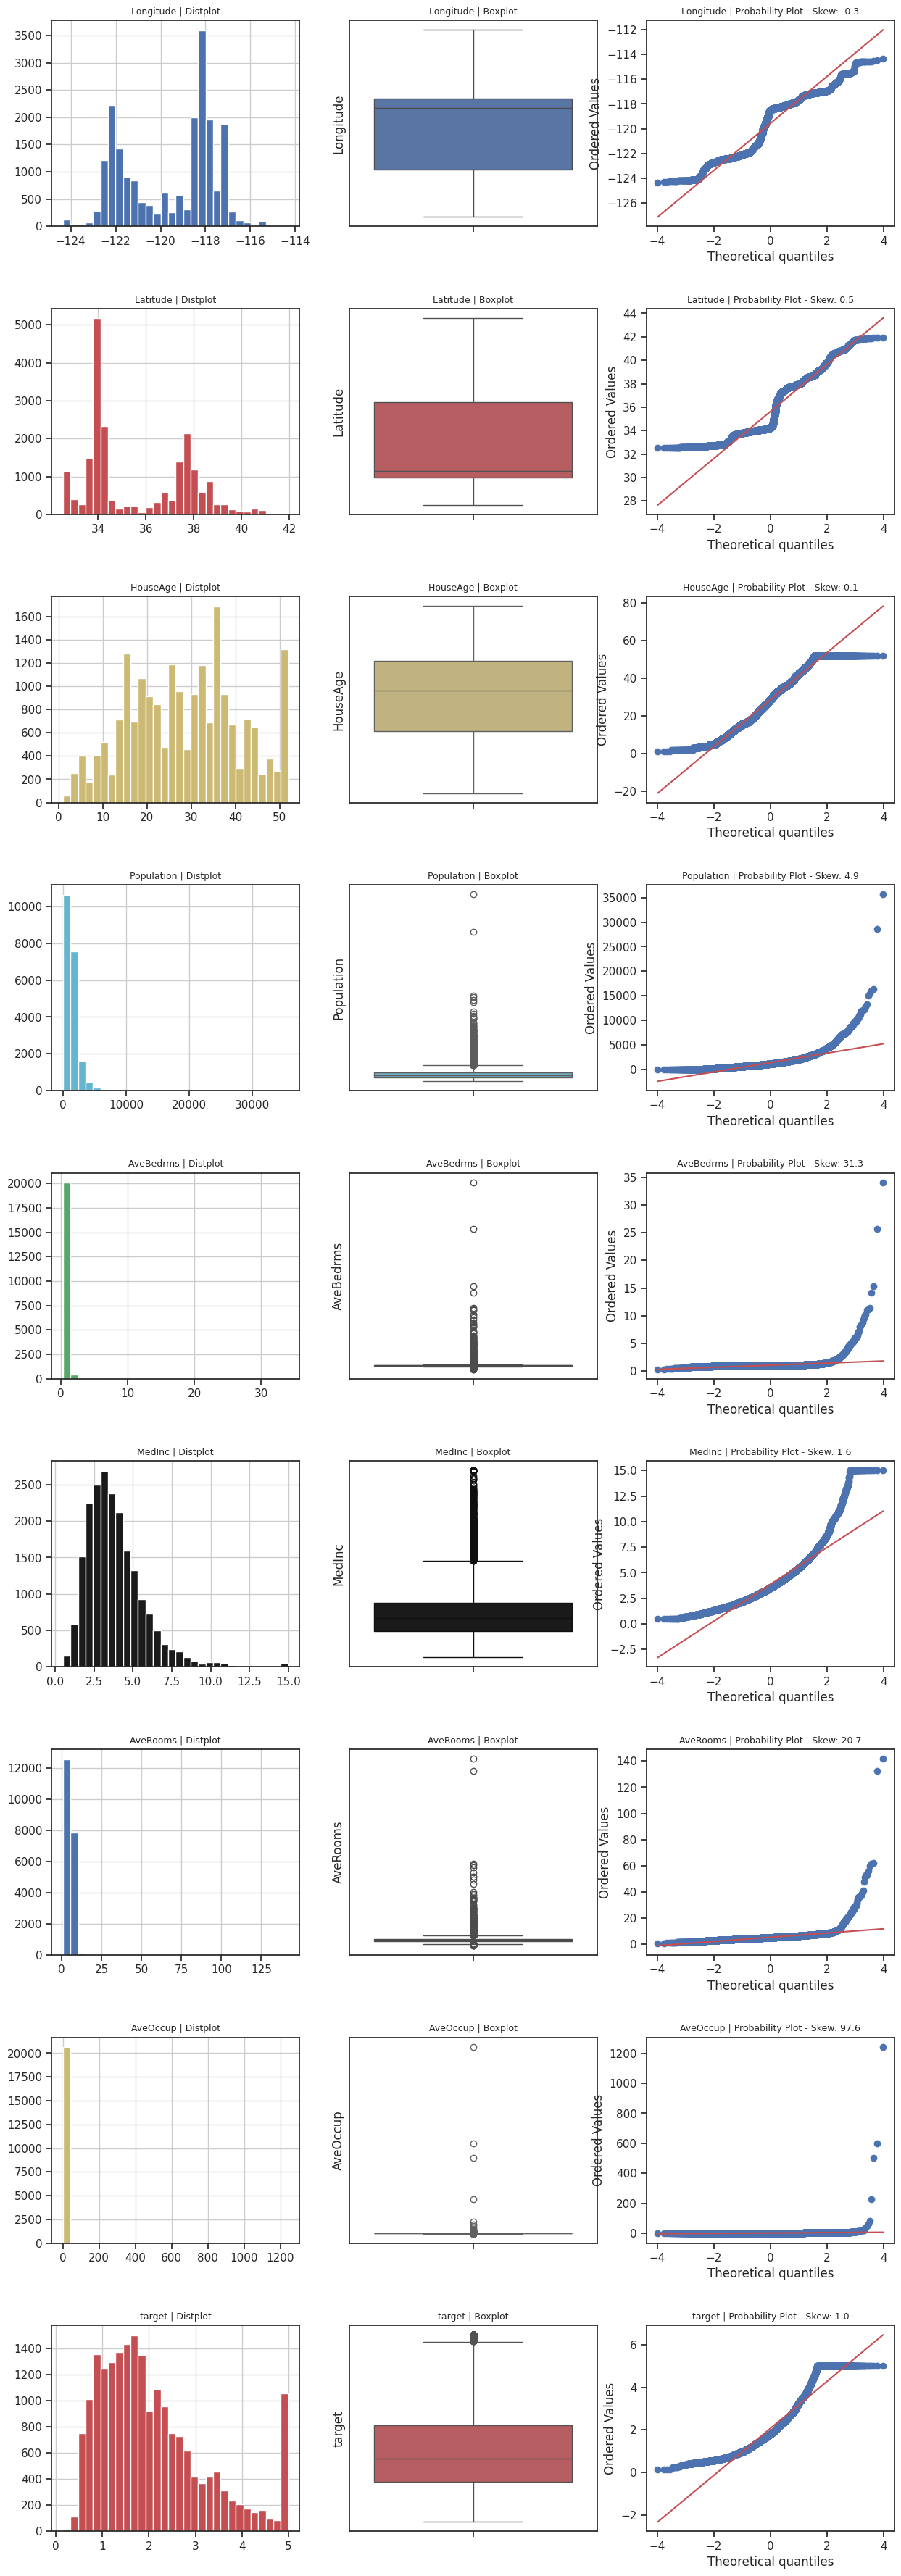

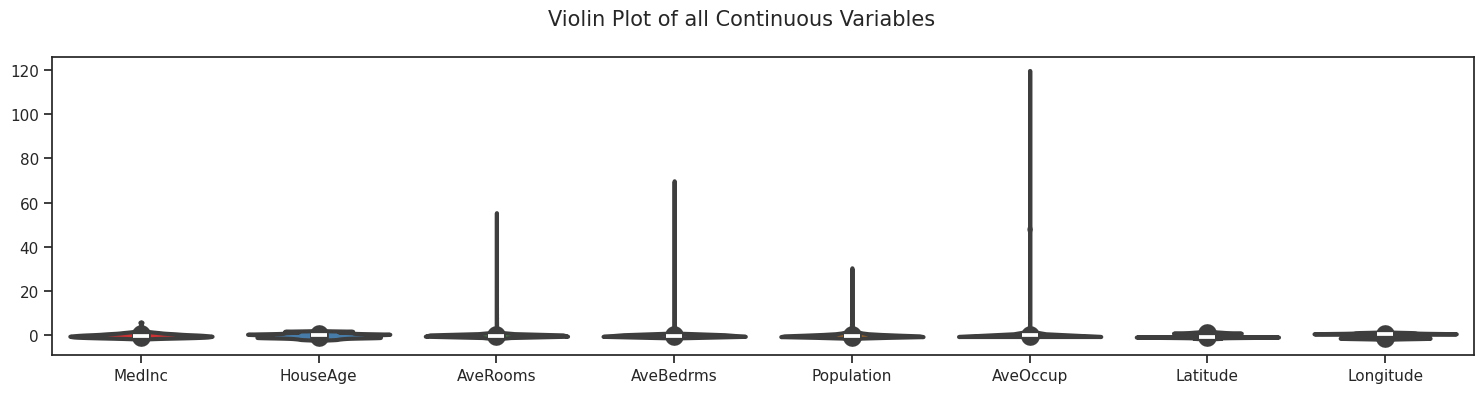

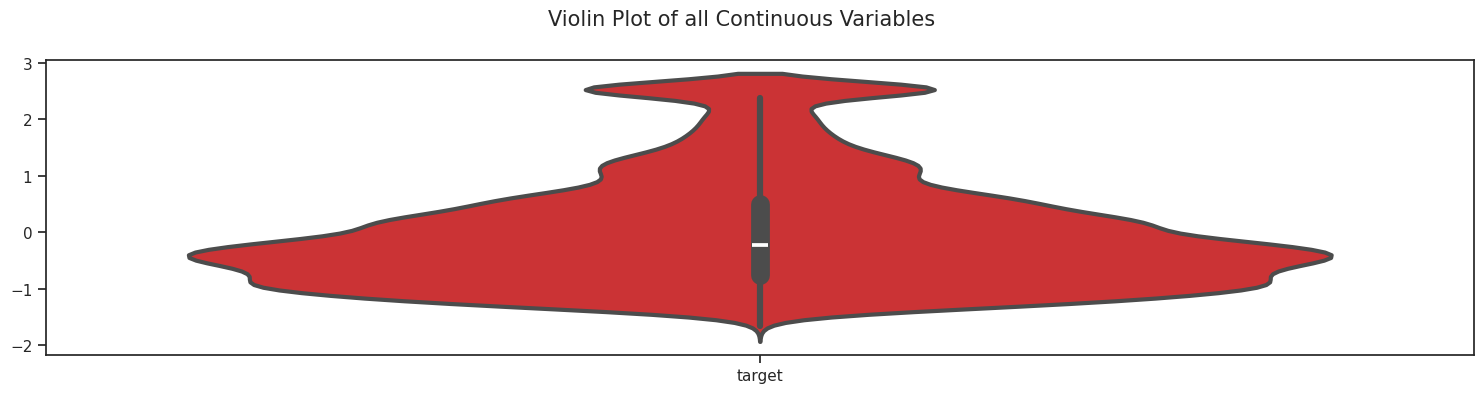

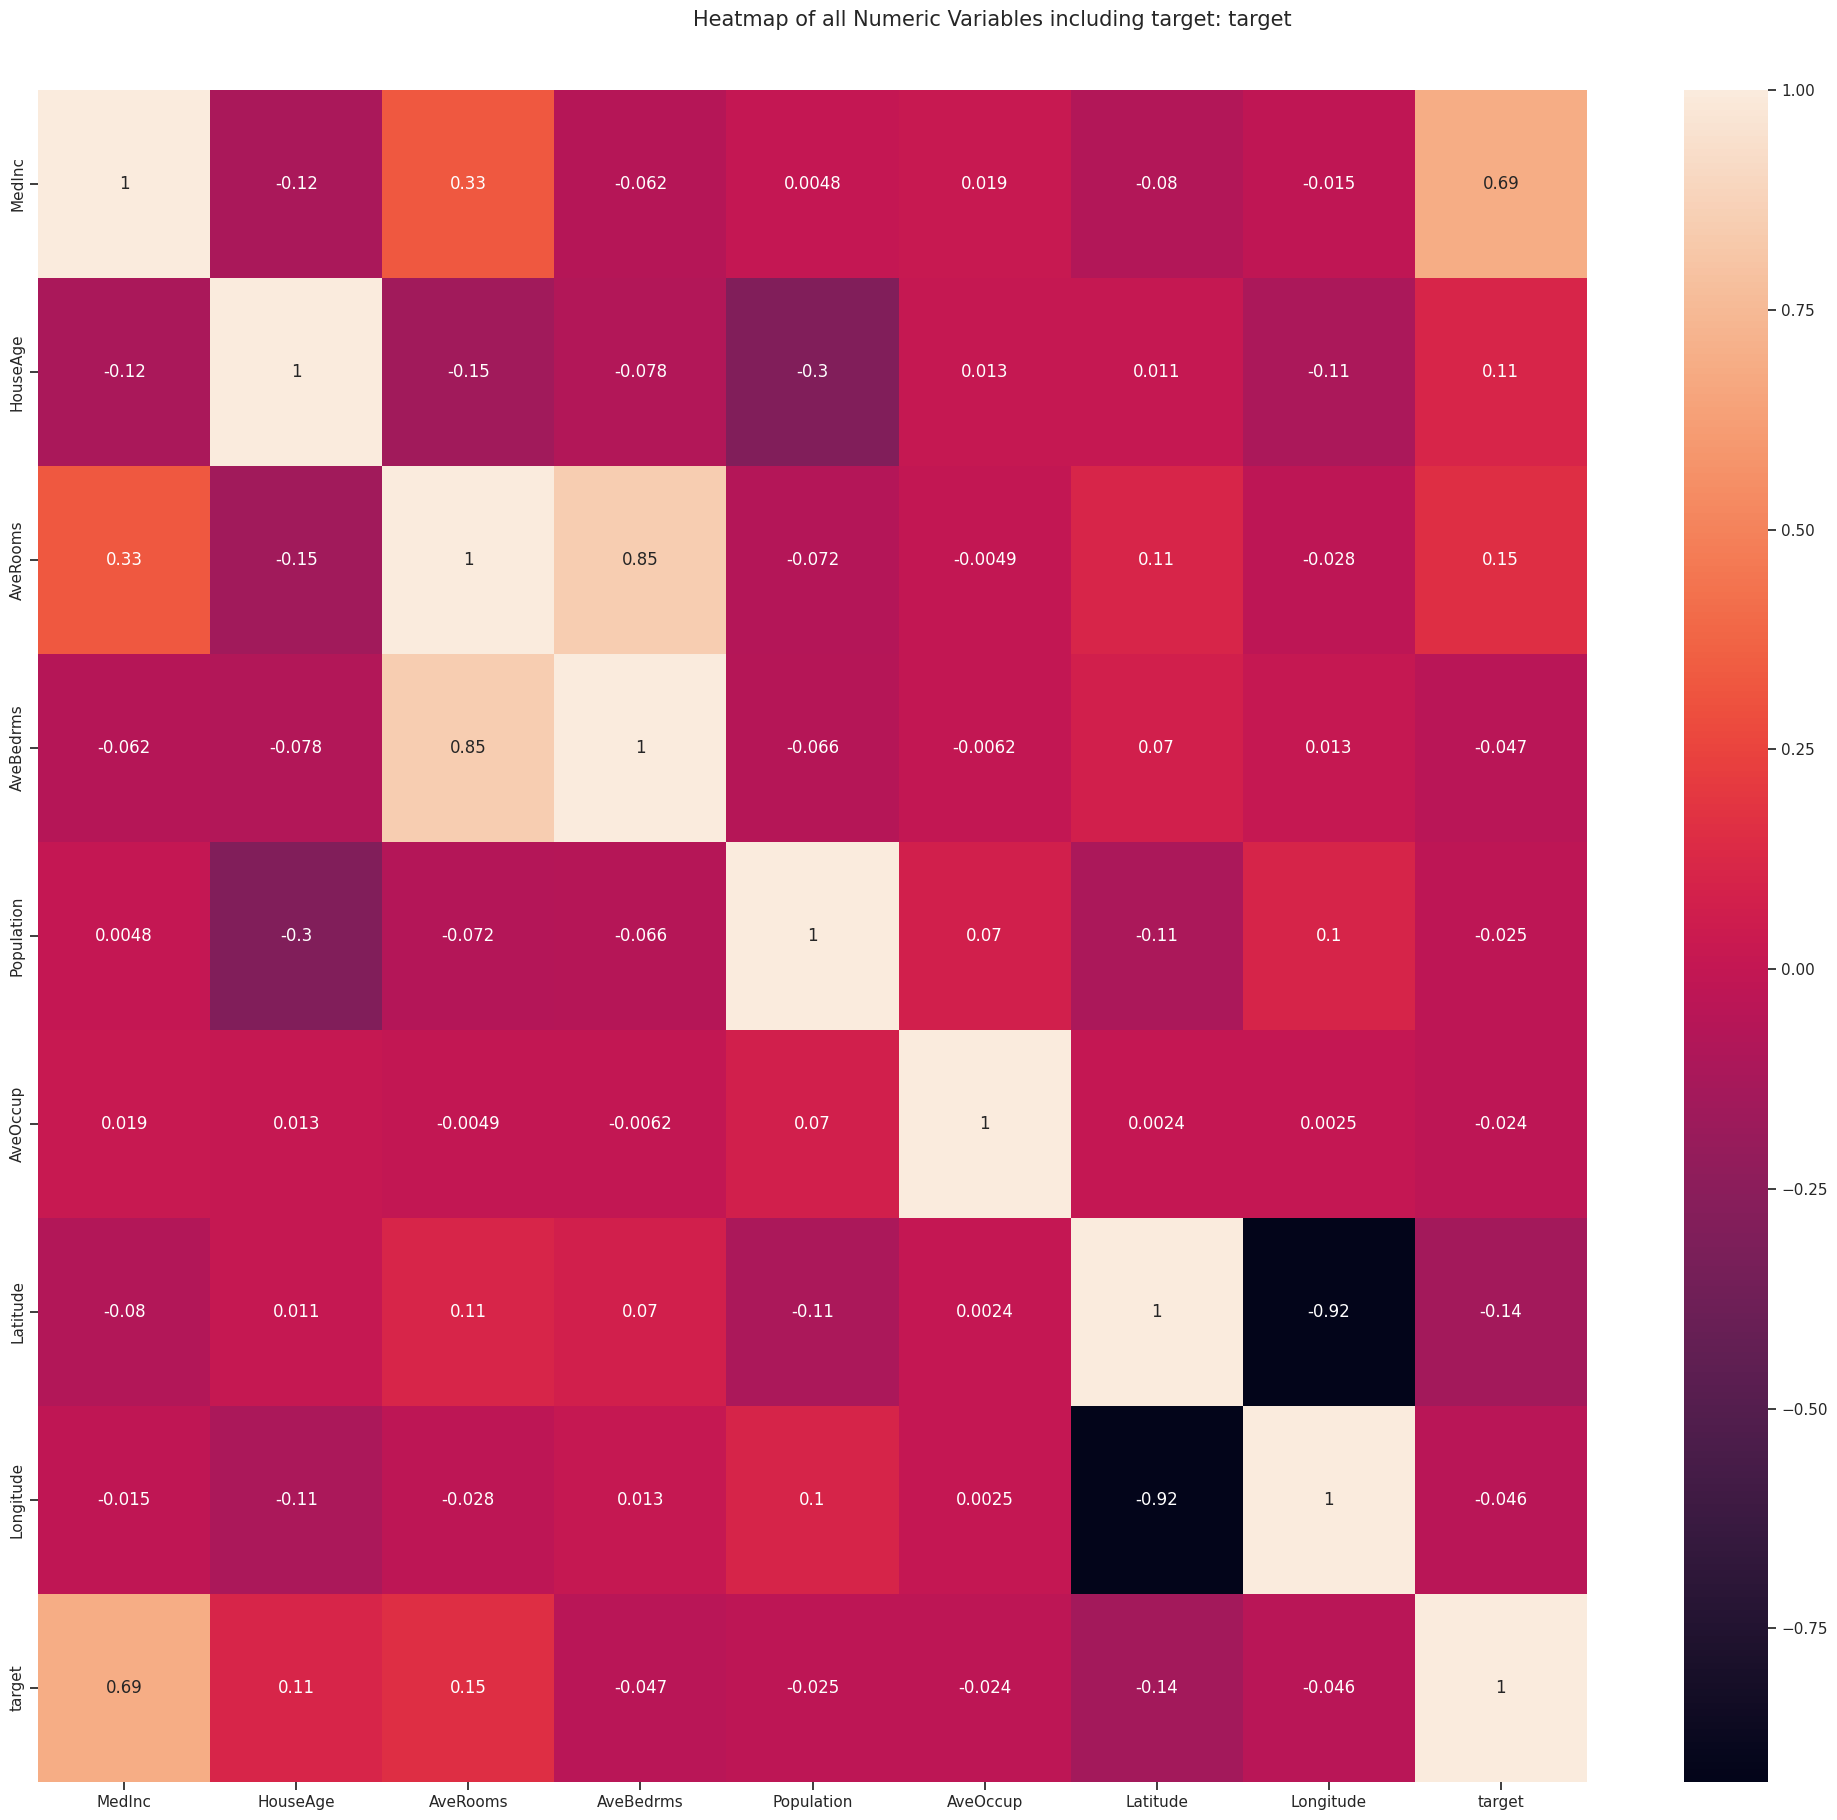

All Plots done
Time to run AutoViz = 23 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [135]:
# Ensure plots are displayed inline
%matplotlib inline

# Import AutoViz
from autoviz.AutoViz_Class import AutoViz_Class

# Initialize AutoViz
AV = AutoViz_Class()

# Visualize the dataset
dft = AV.AutoViz("", dfte=dataset, depVar='target')


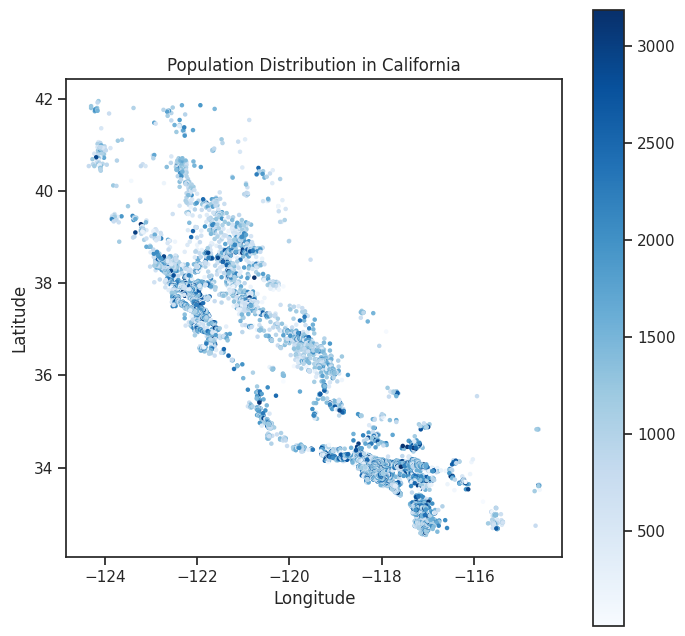

In [173]:
import geopandas as gpd

# Convert latitude and longitude to a GeoDataFrame
gdf = gpd.GeoDataFrame(dataset, geometry=gpd.points_from_xy(dataset[ 'Longitude'], dataset['Latitude']))

# Plotting population as a scatter plot on a map
fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, column='Population', cmap='Blues', legend=True, markersize=5)
plt.title('Population Distribution in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<Axes: xlabel='Longitude', ylabel='Latitude'>

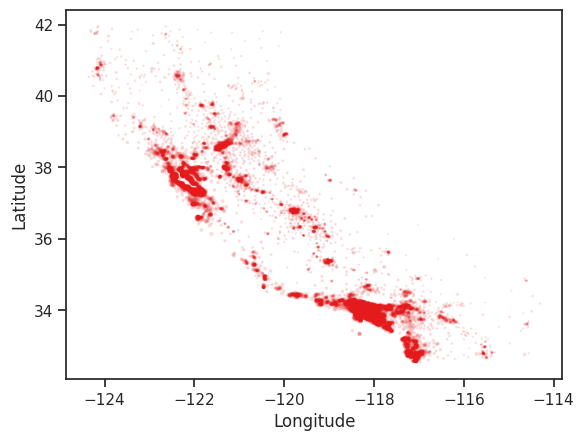

In [137]:
dataset.plot(kind = 'scatter', x= 'Longitude', y = 'Latitude', alpha = 0.1,
             s = dataset['target'], cmap = plt.get_cmap('jet'))

### **Data Analysis**

In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


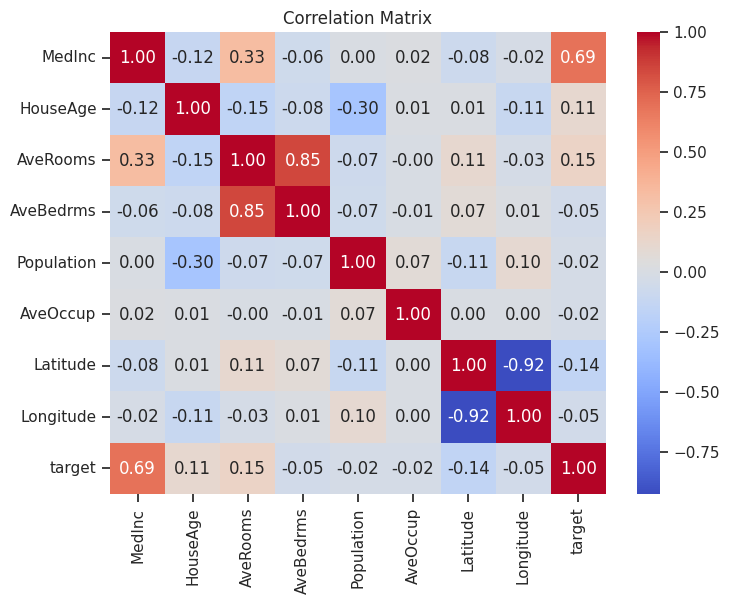

In [139]:
corr_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [140]:
# Removing outliers
for feature in data.feature_names:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    filtered_indices = dataset[(dataset[feature] >= lower_bound) & (dataset[feature] <= upper_bound)].index

    # Remove outliers from the dataset
    dataset = dataset.loc[filtered_indices]

# Reset the index of the dataset
dataset.reset_index(drop=True, inplace=True)

# Display the outlier-free dataset
print(dataset)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      5.6431    52.0    5.817352  1.073059      558.0    2.547945    37.85    
1      3.8462    52.0    6.281853  1.081081      565.0    2.181467    37.85    
2      4.0368    52.0    4.761658  1.103627      413.0    2.139896    37.85    
3      3.6591    52.0    4.931907  0.951362     1094.0    2.128405    37.84    
4      3.1200    52.0    4.797527  1.061824     1157.0    1.788253    37.84    
...       ...       ...       ...        ...         ...       ...       ...   
16808  3.7125    28.0    6.779070  1.148256     1041.0    3.026163    39.27    
16809  1.5603    25.0    5.045455  1.133333      845.0    2.560606    39.48    
16810  1.7000    17.0    5.205543  1.120092     1007.0    2.325635    39.43    
16811  1.8672    18.0    5.329513  1.171920      741.0    2.123209    39.43    
16812  2.3886    16.0    5.254717  1.162264     1387.0    2.616981    39.37    

       Longitude  target  
0      -122.

In [141]:
dataset =dataset[~dataset['target'].isin([4.50000,3.50000,2.75000,5.00000,5.00001])].reset_index(drop = True)

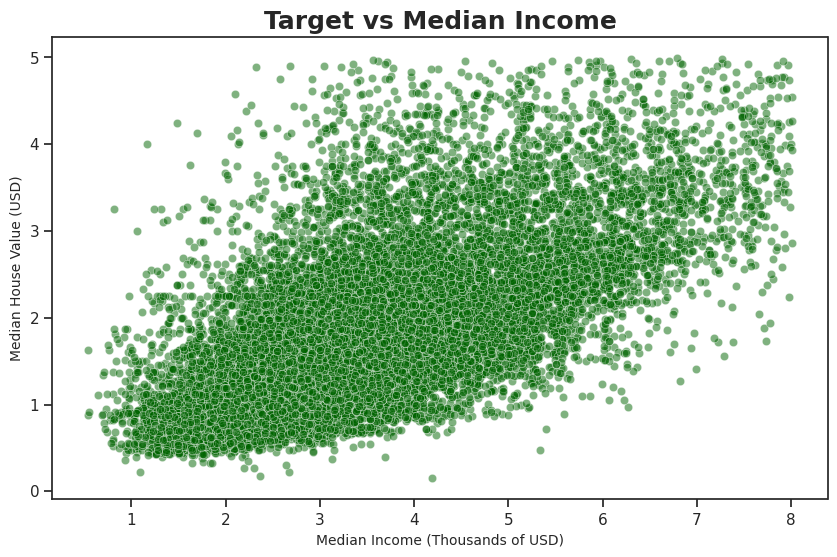

In [142]:
dataset =dataset[~dataset['target'].isin([4.50000,3.50000,2.75000,5.00000,5.00001])].reset_index(drop = True)
## Checking how our data looks after the changes

plt.figure(figsize = (10,6))
plt.title("Target vs Median Income", fontsize = 18, fontweight = 'bold')
sns.scatterplot(data = dataset, y = 'target', x = 'MedInc', alpha = 0.5, color = 'darkgreen')
plt.xlabel("Median Income (Thousands of USD)", fontsize = 10)
plt.ylabel("Median House Value (USD)", fontsize = 10);

## **Feature Engineering**

- Latitude and Longitude Clustering: Instead of using latitude and longitude directly, you can cluster them into regions or neighborhoods. This can be done using techniques like K-means clustering, where the clusters represent different geographical regions with similar housing characteristics.
- Income per Capita: Divide the median income by the population of each district to get the income per capita. This can be a useful feature to understand the wealth distribution within each area.

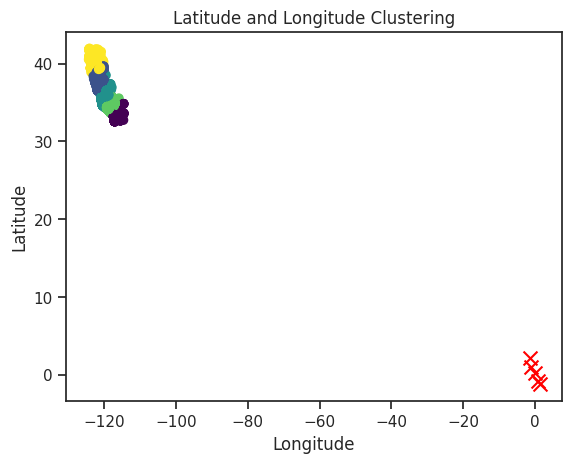

In [143]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
# Assuming you have a DataFrame df with latitude and longitude columns

# Extract latitude and longitude columns
X = dataset[['Latitude', 'Longitude']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
k = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add cluster labels to the original DataFrame
dataset['LL_cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(dataset['Longitude'], dataset['Latitude'], c=dataset['LL_cluster'], cmap='viridis')
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', c='red', s=100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude Clustering')
plt.show()


In [144]:
dataset['Income_per_Capita'] = dataset['MedInc'] / dataset['Population']

In [145]:
dataset.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target', 'LL_cluster', 'Income_per_Capita'],
      dtype='object')

## **Data Preprocessing**

In [147]:
# prompt: generate  one hot encoding on LL_cluster

import pandas as pd
dataset = pd.get_dummies(dataset, columns=['LL_cluster'])
dataset.head()


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.6431    52.0    5.817352  1.073059      558.0    2.547945    37.85    
1  3.8462    52.0    6.281853  1.081081      565.0    2.181467    37.85    
2  4.0368    52.0    4.761658  1.103627      413.0    2.139896    37.85    
3  3.6591    52.0    4.931907  0.951362     1094.0    2.128405    37.84    
4  3.1200    52.0    4.797527  1.061824     1157.0    1.788253    37.84    

   Longitude  target  Income_per_Capita  LL_cluster_0  LL_cluster_1  \
0  -122.25     3.413      0.010113           False         True       
1  -122.25     3.422      0.006807           False         True       
2  -122.25     2.697      0.009774           False         True       
3  -122.25     2.992      0.003345           False         True       
4  -122.25     2.414      0.002697           False         True       

   LL_cluster_2  LL_cluster_3  LL_cluster_4  
0      False         False         False     
1      False         False         False     
2      False         False         False     
3      False         False         False     
4      False         False         False

In [148]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in dataset.select_dtypes(include='bool'):
    dataset[column] = le.fit_transform(dataset[column])
dataset.head()


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.6431    52.0    5.817352  1.073059      558.0    2.547945    37.85    
1  3.8462    52.0    6.281853  1.081081      565.0    2.181467    37.85    
2  4.0368    52.0    4.761658  1.103627      413.0    2.139896    37.85    
3  3.6591    52.0    4.931907  0.951362     1094.0    2.128405    37.84    
4  3.1200    52.0    4.797527  1.061824     1157.0    1.788253    37.84    

   Longitude  target  Income_per_Capita  LL_cluster_0  LL_cluster_1  \
0  -122.25     3.413      0.010113             0             1        
1  -122.25     3.422      0.006807             0             1        
2  -122.25     2.697      0.009774             0             1        
3  -122.25     2.992      0.003345             0             1        
4  -122.25     2.414      0.002697             0             1        

   LL_cluster_2  LL_cluster_3  LL_cluster_4  
0        0             0             0       
1        0             0             0       
2        0             0             0       
3        0             0             0       
4        0             0             0

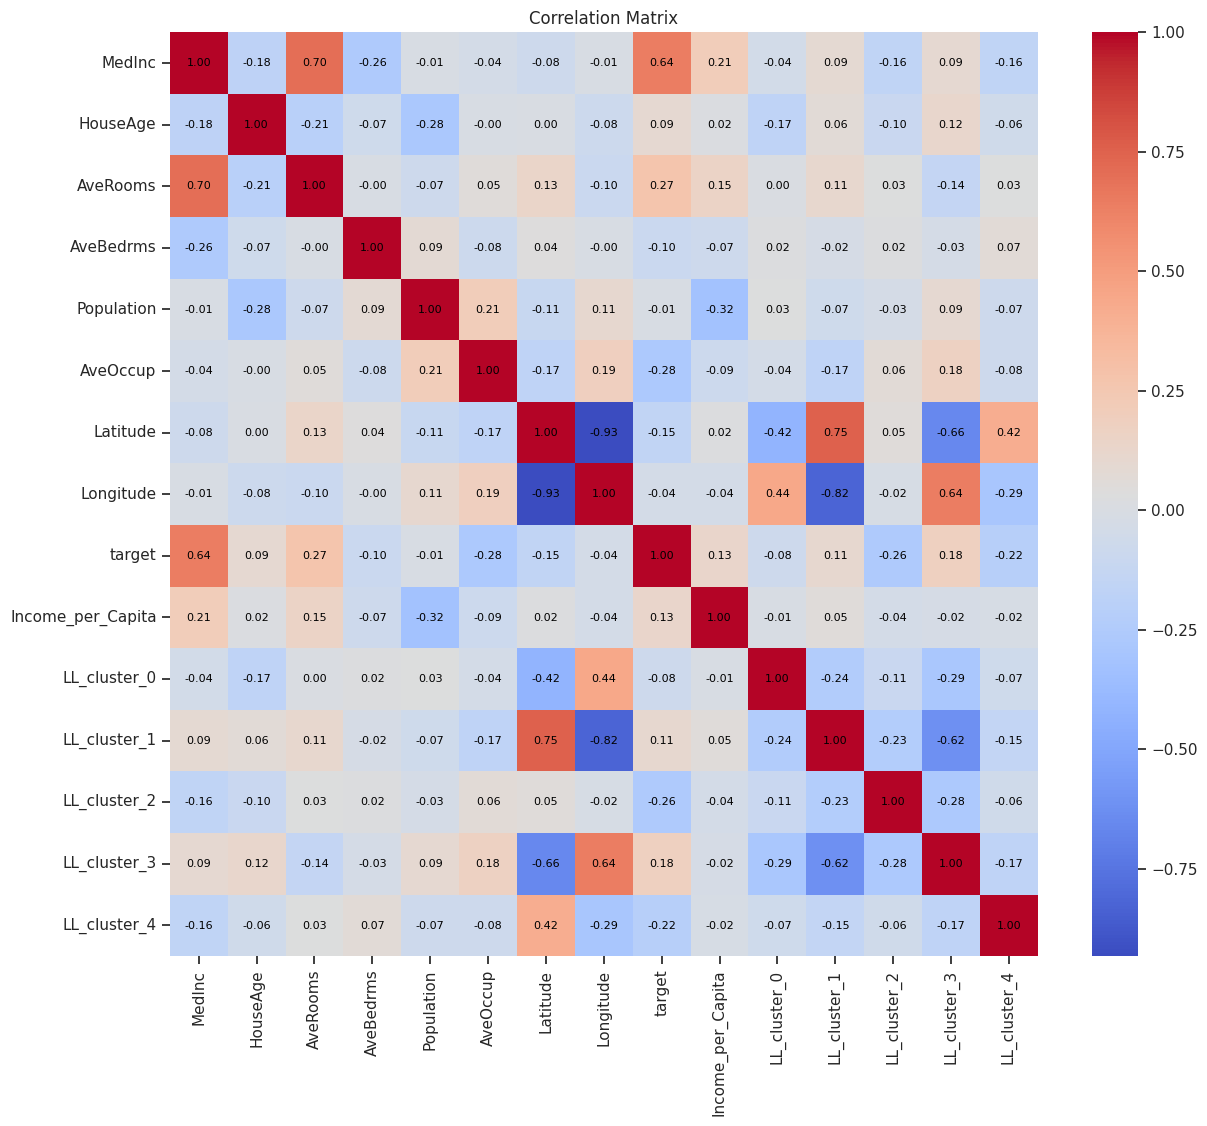

In [149]:
corr_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8, "color": 'black'}) # <- Customize annotation properties
plt.title('Correlation Matrix')
plt.show()

In [150]:
# prompt: drop target column from the dataset_interacted and strore it into dataset_features and store the target column in the dataset_target

dataset_target = dataset['target']
dataset_F = dataset.drop('target', axis=1)

print(dataset_F.shape)
print(dataset_target.shape)


(16224, 14)
(16224,)


In [151]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset_scaled = scaler.fit_transform(dataset_F)

dataset_scaled


array([[0.68319666, 1.        , 0.59993502, ..., 0.        , 0.        ,
        0.        ],
       [0.44281835, 1.        , 0.67559042, ..., 0.        , 0.        ,
        0.        ],
       [0.46831565, 1.        , 0.42798965, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.15571281, 0.31372549, 0.50028707, ..., 0.        , 0.        ,
        1.        ],
       [0.17807981, 0.33333333, 0.52047863, ..., 0.        , 0.        ,
        1.        ],
       [0.24782952, 0.29411765, 0.50829629, ..., 0.        , 0.        ,
        1.        ]])

In [152]:
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset_F.columns)
dataset_scaled.head()


MedInc   HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.683197     1.0    0.599935  0.559646    0.173228   0.406673  0.564293   
1  0.442818     1.0    0.675590  0.581735    0.175433   0.299194  0.564293   
2  0.468316     1.0    0.427990  0.643819    0.127559   0.287002  0.564293   
3  0.417789     1.0    0.455719  0.224532    0.342047   0.283632  0.563231   
4  0.345672     1.0    0.433832  0.528707    0.361890   0.183873  0.563231   

   Longitude  Income_per_Capita  LL_cluster_0  LL_cluster_1  LL_cluster_2  \
0  0.214724       0.021077            0.0           1.0           0.0       
1  0.214724       0.014021            0.0           1.0           0.0       
2  0.214724       0.020354            0.0           1.0           0.0       
3  0.214724       0.006630            0.0           1.0           0.0       
4  0.214724       0.005247            0.0           1.0           0.0       

   LL_cluster_3  LL_cluster_4  
0       0.0           0.0      
1       0.0           0.0      
2       0.0           0.0      
3       0.0           0.0      
4       0.0           0.0

In [153]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset_scaled, dataset_target, test_size=0.2, random_state=42)

# Further split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10383, 14)
y_train shape: (10383,)
X_val shape: (2596, 14)
y_val shape: (2596,)
X_test shape: (3245, 14)
y_test shape: (3245,)


## **Model Building And Evaluation**

In [154]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Ordinary Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model on the validation data
y_val_pred = linear_model.predict(X_val)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Evaluate the model on the validation data
y_val_pred_ridge = ridge_model.predict(X_val)


# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Evaluate the model on the validation data
y_val_pred_lasso = lasso_model.predict(X_val)

# Print the validation errors for each model
print("Linear Regression Validation Error:", mean_squared_error(y_val, y_val_pred))
print("Linear Regression R2-Square:", linear_model.score(X_val,y_val))
print("Ridge Regression Validation Error:", mean_squared_error(y_val, y_val_pred_ridge))
print("Ridge Regression R2-Square:", ridge_model.score(X_val,y_val))
print("Lasso Regression Validation Error:", mean_squared_error(y_val, y_val_pred_lasso))
print("Lasso Regression R2-Square:", lasso_model.score(X_val,y_val))


Linear Regression Validation Error: 0.30873931911748953
Linear Regression R2-Square: 0.654254215385298
Ridge Regression Validation Error: 0.3087825693085532
Ridge Regression R2-Square: 0.6542057810903505
Lasso Regression Validation Error: 0.7858292945316432
Lasso Regression R2-Square: 0.11997873549864435


In [155]:
from sklearn.svm import SVR

# Create a support vector regressor
svr_model = SVR(kernel='rbf', C=100, gamma=0.3)

# Train the model on the training data
svr_model.fit(X_train, y_train)

# Evaluate the model on the validation data
y_val_pred_svr = svr_model.predict(X_val)

# Calculate the validation error
validation_error_svr = mean_squared_error(y_val, y_val_pred_svr)
r_square_score = svr_model.score(X_val,y_val)

# Print the validation error
print("Support Vector Regression Validation Error:", validation_error_svr)
print('R-Square:',r_square_score )


Support Vector Regression Validation Error: 0.22560249592377252
R-Square: 0.7473560795976335


In [157]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor
decision_tree_model = DecisionTreeRegressor(max_depth=7)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Evaluate the model on the validation data
y_val_pred_dt = decision_tree_model.predict(X_val)

# Calculate the validation error
validation_error_dt = mean_squared_error(y_val, y_val_pred_dt)
r2_score_DT = decision_tree_model.score(X_val,y_val)

# Print the validation error
print("Decision Tree Validation Error:", validation_error_dt)
print("R2-Square:", r2_score_DT)

Decision Tree Validation Error: 0.3205287601708692
R2-Square: 0.6410516548600598


In [158]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
random_forest_model = RandomForestRegressor(random_state=32)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Evaluate the model on the validation data
y_val_pred_rf = random_forest_model.predict(X_val)

# Calculate the validation error
validation_error_rf = mean_squared_error(y_val, y_val_pred_rf)
r2_score_random = random_forest_model.score(X_val,y_val)

# Print the validation error
print("Random Forest Validation Error:", validation_error_rf)
print("R2_Square:", r2_score_random)

Random Forest Validation Error: 0.1917495462773139
R2_Square: 0.7852667502258301


In [159]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Define the random forest regressor
random_forest_model = RandomForestRegressor(random_state=32)

# Define the KFold cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean squared error
mse_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mean_mse = np.mean(mse_scores)

# Print the results
print("Mean Squared Error (KFold):", -mean_mse)



Mean Squared Error (KFold): 0.19954260715512345


In [160]:
from sklearn.neural_network import MLPRegressor

# Create a neural network regressor
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)

# Train the model on the training data
nn_model.fit(X_train, y_train)

# Evaluate the model on the validation data
y_val_pred_nn = nn_model.predict(X_val)

# Calculate the validation error
validation_error_nn = mean_squared_error(y_val, y_val_pred_nn)

# Print the validation error
print("Neural Network Validation Error:", validation_error_nn)


Neural Network Validation Error: 0.22852747051377195


In [161]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=500, random_state=32)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_gb = gb_model.predict(X_val)

# Calculate the mean squared error
mse_gb = mean_squared_error(y_val, y_val_pred_gb)

# Calculate the R-squared score
r2_gb = gb_model.score(X_val, y_val)

# Print the results
print("Gradient Boosting Regressor:")
print("- Mean Squared Error:", mse_gb)
print("- R-squared:", r2_gb)

Gradient Boosting Regressor:
- Mean Squared Error: 0.15345313089263155
- R-squared: 0.8281534943663418


In [162]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(max_depth=5, n_estimators=500, random_state=32)

# Define the KFold cross-validation strategy
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean squared error
mse_scores = cross_val_score(gbr_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mean_mse = np.mean(mse_scores)

# Perform cross-validation and calculate R^2
r2_scores = cross_val_score(gbr_model, X_train, y_train, cv=kfold, scoring='r2')
mean_r2 = np.mean(r2_scores)

# Print the results
print("Mean Squared Error (KFold):", -mean_mse)
print("R^2 (KFold):", mean_r2)



Mean Squared Error (KFold): 0.15473908686671511
R^2 (KFold): 0.8287377837535297


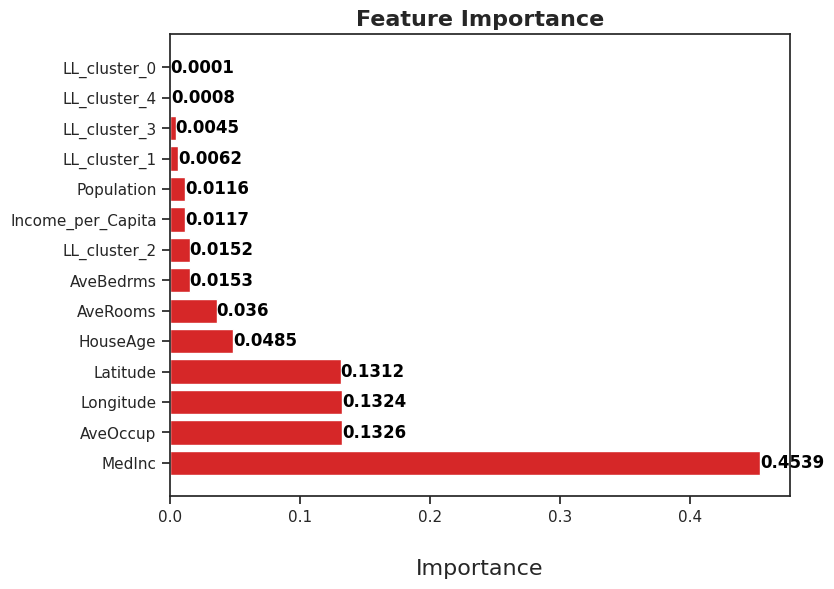

In [163]:
gbr_model.fit(X_train, y_train)


fi_df = pd.DataFrame({"FEATURE": list(X_train.columns), "IMPORTANCE": gb_model.feature_importances_})
fi_df = fi_df.sort_values("IMPORTANCE", ascending=False).reset_index(drop = True)

plt.figure(figsize=(8, 6))
plt.barh(y=fi_df['FEATURE'], width=fi_df['IMPORTANCE'], color ="tab:red")
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=16, labelpad=25)

for index, value in enumerate(fi_df["IMPORTANCE"].round(4)):
    plt.text(value, index, str(value), color='black', fontweight="bold", fontsize=12, verticalalignment='center')

plt.show()

In [165]:
# prompt: code to drop the least important columns

least_important_columns = fi_df[fi_df['IMPORTANCE'] < 0.01]['FEATURE'].tolist()
print(least_important_columns)
dataset_Final = dataset_F.drop(least_important_columns, axis=1)


['LL_cluster_1', 'LL_cluster_3', 'LL_cluster_4', 'LL_cluster_0']


In [166]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset_scaled = scaler.fit_transform(dataset_Final)


from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset_scaled, dataset_target, test_size=0.2, random_state=42)

# Further split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10383, 10)
y_train shape: (10383,)
X_val shape: (2596, 10)
y_val shape: (2596,)
X_test shape: (3245, 10)
y_test shape: (3245,)


In [167]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=500, random_state=32)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_gb = gb_model.predict(X_val)

# Calculate the mean squared error
mse_gb = mean_squared_error(y_val, y_val_pred_gb)

# Calculate the R-squared score
r2_gb = gb_model.score(X_val, y_val)

# Print the results
print("Gradient Boosting Regressor:")
print("- Mean Squared Error:", mse_gb)
print("- R-squared:", r2_gb)

Gradient Boosting Regressor:
- Mean Squared Error: 0.15320785261834863
- R-squared: 0.8284281724657601


In [168]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(max_depth=5, n_estimators=500, random_state=32)

# Define the KFold cross-validation strategy
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean squared error
mse_scores = cross_val_score(gbr_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mean_mse = np.mean(mse_scores)

# Perform cross-validation and calculate R^2
r2_scores = cross_val_score(gbr_model, X_train, y_train, cv=kfold, scoring='r2')
mean_r2 = np.mean(r2_scores)

# Print the results
print("Mean Squared Error (KFold):", -mean_mse)
print("R^2 (KFold):", mean_r2)



Mean Squared Error (KFold): 0.15410424090778302
R^2 (KFold): 0.8294240484361142


## **Model Predictions**

In [171]:
# Define the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(max_depth=5, n_estimators=500, random_state=32)

# Fit the model
gbr_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred_gbr = gbr_model.predict(X_test)

# Calculate the mean squared error
mse_gb = mean_squared_error(y_test, y_test_pred_gbr)

# Calculate the R-squared score
r2_gb = gb_model.score(X_test, y_test)

# Print the results
print("Gradient Boosting Regressor:")
print("- Mean Squared Error:", mse_gb)
print("- R-squared:", r2_gb)

Gradient Boosting Regressor:
- Mean Squared Error: 0.17117853983185663
- R-squared: 0.8122549971308772
